<a href="https://colab.research.google.com/github/cjakuc/DS-Unit1-Build-Week/blob/master/Notebooks/Unit1BuildWeek_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in CSVs
df_energy = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Energy%20Data/pjm_dayton_clean.csv?raw=true',
                        parse_dates=True,
                        index_col=0)
df_daily_temp = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/raw/master/Weather%20Data/dayton_daily_temp.csv',
                             parse_dates=True,
                             index_col=0)
df_hourly_temp = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/dayton_hourly_temp.csv?raw=true',
                             parse_dates=True,
                             index_col=0,
                             header=None,
                             names=['AirTemp'])
print(df_energy.head())
print(df_daily_temp.head())
df_hourly_temp.head()

                         MW  year  month  date timestamp  season
Datetime                                                        
2005-01-01 00:00:00  1560.0  2005      1     1  00:00:00  winter
2005-12-31 01:00:00  1706.0  2005     12   365  01:00:00  winter
2005-12-31 02:00:00  1630.0  2005     12   365  02:00:00  winter
2005-12-31 03:00:00  1586.0  2005     12   365  03:00:00  winter
2005-12-31 04:00:00  1569.0  2005     12   365  04:00:00  winter
            DailyAvgAirTemp  DailyCoolingDegreeDays  DailyHeatingDegreeDays
2005-01-01             48.0                     0.0                    17.0
2005-01-02             52.0                     0.0                    13.0
2005-01-03             50.0                     0.0                    15.0
2005-01-04             40.0                     0.0                    25.0
2005-01-05             36.0                     0.0                    29.0


,AirTemp
2005-01-01 00:00:00,50.000000
2005-01-01 01:00:00,50.833333
2005-01-01 02:00:00,50.000000
2005-01-01 03:00:00,50.000000
2005-01-01 04:00:00,50.000000


In [0]:
# Add year, month, date, timestamp, and season variable to df_hourly_temp
df_hourly_temp['year'] = df_hourly_temp.index.year
df_hourly_temp['month'] = df_hourly_temp.index.month
df_hourly_temp['date'] = df_hourly_temp.index.dayofyear
df_hourly_temp['timestamp'] = df_hourly_temp.index.time
df_hourly_temp['season'] = (df_hourly_temp.index.month%12 + 3)//3
df_hourly_temp['season'] = df_hourly_temp['season'].replace({1:'winter',
                                     2:'spring',
                                     3:'summer',
                                     4:'fall'})

In [0]:
# Add year, month, date, timestamp, and season variable to df_daily_temp
df_daily_temp['year'] = df_daily_temp.index.year
df_daily_temp['month'] = df_daily_temp.index.month
df_daily_temp['date'] = df_daily_temp.index.dayofyear
df_daily_temp['timestamp'] = df_daily_temp.index.time
df_daily_temp['season'] = (df_daily_temp.index.month%12 + 3)//3
df_daily_temp['season'] = df_daily_temp['season'].replace({1:'winter',
                                     2:'spring',
                                     3:'summer',
                                     4:'fall'})

# Plot Autocorrelation of Energy Demand

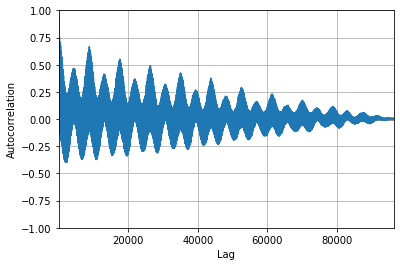

In [5]:
# Autocorrelation plot
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(df_energy['MW'])
pyplot.show()

# Plot Seasonal Variation in Hourly Energy Demand

In [0]:
# Create a df that has the average MW of every hour, in each season

# Group data first by year, then by month
g = df_energy.groupby(['season','timestamp'])

# For each group, calculate the average of only the MW column
season_energy_hourly_averages = g.aggregate({'MW':np.mean})

# Create subsetted average DFs for each season
season1_energy = season_energy_hourly_averages.loc[(season_energy_hourly_averages.index.get_level_values('season')=='winter')]
season2_energy = season_energy_hourly_averages.loc[(season_energy_hourly_averages.index.get_level_values('season')=='spring')]
season3_energy = season_energy_hourly_averages.loc[(season_energy_hourly_averages.index.get_level_values('season')=='summer')]
season4_energy = season_energy_hourly_averages.loc[(season_energy_hourly_averages.index.get_level_values('season')=='fall')]

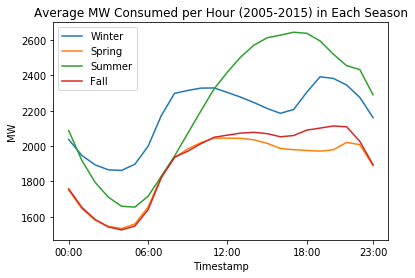

In [7]:
# Plot seasonal variation in hourly average energy demand w/ seaborn

sns.lineplot(x=season1_energy.index.get_level_values('timestamp'),
             y=season1_energy['MW'])
sns.lineplot(x=season2_energy.index.get_level_values('timestamp'),
             y=season2_energy['MW'])
sns.lineplot(x=season3_energy.index.get_level_values('timestamp'),
             y=season3_energy['MW'])
sns.lineplot(x=season4_energy.index.get_level_values('timestamp'),
             y=season4_energy['MW'])
plt.legend(labels=['Winter','Spring','Summer','Fall'])
plt.xlabel('Timestamp')
plt.title('Average MW Consumed per Hour (2005-2015) in Each Season')
plt.xticks(ticks=['00:00:00','06:00:00','12:00:00','18:00:00','23:00:00'],
           labels=['00:00','06:00','12:00','18:00','23:00']);

#Plot Seasonal Variation in Hourly Temperature

In [0]:
# Create a df that has the average temp of every hour, in each season

# Group data first by year, then by month
g = df_hourly_temp.groupby(['season','timestamp'])

# For each group, calculate the average of only the temperature column
season_temp_hourly_averages = g.aggregate({'AirTemp':np.mean})

# Create subsetted average DFs for each season
season1_temp = season_temp_hourly_averages.loc[(season_temp_hourly_averages.index.get_level_values('season')=='winter')]
season2_temp = season_temp_hourly_averages.loc[(season_temp_hourly_averages.index.get_level_values('season')=='spring')]
season3_temp = season_temp_hourly_averages.loc[(season_temp_hourly_averages.index.get_level_values('season')=='summer')]
season4_temp = season_temp_hourly_averages.loc[(season_temp_hourly_averages.index.get_level_values('season')=='fall')]

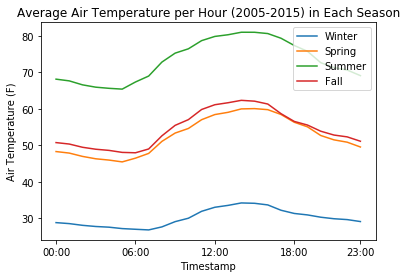

In [9]:
# Plot seasonal variation in hourly average temp w/ seaborn

sns.lineplot(x=season1_temp.index.get_level_values('timestamp'),
             y=season1_temp['AirTemp'])
sns.lineplot(x=season2_temp.index.get_level_values('timestamp'),
             y=season2_temp['AirTemp'])
sns.lineplot(x=season3_temp.index.get_level_values('timestamp'),
             y=season3_temp['AirTemp'])
sns.lineplot(x=season4_temp.index.get_level_values('timestamp'),
             y=season4_temp['AirTemp'])
plt.legend(labels=['Winter','Spring','Summer','Fall'])
plt.xlabel('Timestamp')
plt.ylabel('Air Temperature (F)')
plt.title('Average Air Temperature per Hour (2005-2015) in Each Season')
plt.xticks(ticks=['00:00:00','06:00:00','12:00:00','18:00:00','23:00:00']);

# Plot Seasonal Variation in Hourly Energy Demand vs Hourly Temp

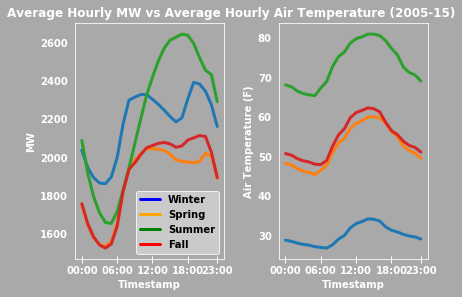

In [133]:
fig = plt.figure(facecolor='darkgray')
ax = plt.subplot(1,1,1)
ax1 = plt.subplot(1,2,1,facecolor='darkgray')

colors = ['blue']
palette = sns.color_palette(colors)
sns.lineplot(x=season1_energy.index.get_level_values('timestamp'),
             y=season1_energy['MW'],
             palette=palette,
             lw=3)
colors = ['orange']
palette = sns.color_palette(colors)
sns.lineplot(x=season2_energy.index.get_level_values('timestamp'),
             y=season2_energy['MW'],
             palette=palette,
             lw=3)
colors = ['green']
palette = sns.color_palette(colors)
sns.lineplot(x=season3_energy.index.get_level_values('timestamp'),
             y=season3_energy['MW'],
             palette=palette,
             lw=3)
colors = ['red']
palette = sns.color_palette(colors)
sns.lineplot(x=season4_energy.index.get_level_values('timestamp'),
             y=season4_energy['MW'],
             palette=palette,
             lw=3)
plt.legend(labels=['Winter','Spring','Summer','Fall'])
plt.xlabel('Timestamp',
           color='white',
           weight='bold')
plt.ylabel('MW',
           color='white',
           weight='bold')
plt.grid(False)
# plt.title('Average MW Consumed per Hour (2005-15)')
plt.xticks(ticks=['00:00:00','06:00:00','12:00:00','18:00:00','23:00:00'],
           labels=['00:00','06:00','12:00','18:00','23:00'],
           weight='bold',
           color='white')
plt.yticks(color='white',
           weight='bold')
# Custom ticks
plt.tick_params(axis='x',
                colors='white',
                direction='inout',
                length=7,
                width=1,
                labelcolor='white')
plt.tick_params(axis='y',
                labelcolor='white')
plt.tick_params(bottom='on')

ax2 = plt.subplot(1,2,2,facecolor='darkgray')
colors = ['blue']
palette = sns.color_palette(colors)
sns.lineplot(x=season1_temp.index.get_level_values('timestamp'),
             y=season1_temp['AirTemp'],
             palette=palette,
             lw=3)
colors = ['orange']
palette = sns.color_palette(colors)
sns.lineplot(x=season2_temp.index.get_level_values('timestamp'),
             y=season2_temp['AirTemp'],
             palette=palette,
             lw=3)
colors = ['green']
palette = sns.color_palette(colors)
sns.lineplot(x=season3_temp.index.get_level_values('timestamp'),
             y=season3_temp['AirTemp'],
             palette=palette,
             lw=3)
colors = ['red']
palette = sns.color_palette(colors)
sns.lineplot(x=season4_temp.index.get_level_values('timestamp'),
             y=season4_temp['AirTemp'],
             palette=palette,
             lw=3)
# plt.legend(labels=['Winter','Spring','Summer','Fall'])
plt.xlabel('Timestamp',
           color='white',
           weight='bold')
plt.ylabel('Air Temperature (F)',
           color='white',
           weight='bold')
plt.xticks(ticks=['00:00:00','06:00:00','12:00:00','18:00:00','23:00:00'],
           weight='bold',
           color='white')
plt.yticks(color='white',
           weight='bold')

plt.suptitle('Average Hourly MW vs Average Hourly Air Temperature (2005-15)',
             y=1.02,
             color='white',
             weight='bold',
             horizontalalignment='center')


# Custom ticks
plt.tick_params(axis='x',
                colors='white',
                direction='inout',
                length=7,
                width=1,
                labelcolor='white')
plt.tick_params(axis='y',
                labelcolor='white')
plt.tick_params(bottom='on')

plt.grid(False)

blue_line = mlines.Line2D([],[],color='blue',
                           linewidth=3)
orange_line = mlines.Line2D([],[],color='orange',
                            linewidth=3)
green_line = mlines.Line2D([],[],color='green',
                           linewidth=3)
red_line = mlines.Line2D([],[],color='red',
                            linewidth=3)

# Create the legend
l = ax1.legend(handles=[blue_line,
                   orange_line,
                   green_line,
                   red_line],
          labels=['Winter',
                  'Spring',
                  'Summer',
                  'Fall'],
          facecolor='lightgray',
          edgecolor='white')

# Change legend font color
for text in l.get_texts():
    text.set_color("black")
    text.set_weight('bold')

plt.tight_layout()

# Plot Average MW of Every Day of a Year

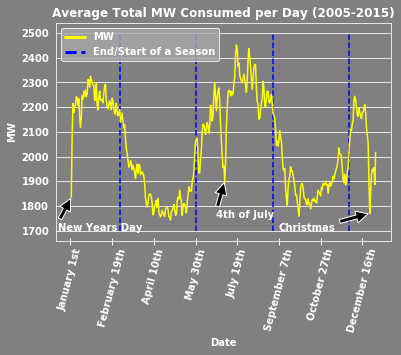

In [134]:
# Create a df that has the average MW of every day

# Group data first by year, then by month
g = df_energy.groupby(['date'])

# For each group, calculate the average of only the MW column
daily_energy_averages = g.aggregate({'MW':np.mean})

# Plot average MW of every day w/ seaborn
fig, ax = plt.subplots()

# Create an array of the last day of each season
season_end = [59,151,243,334]
season_end_labels = ['End of Winter',
                     'End of Spring',
                     'End of Summer',
                     'End of Fall']
season_x_labels=['January 1st',
                 'February 19th',
                 'April 10th',
                 'May 30th',
                 'July 19th',
                 'September 7th',
                 'October 27th',
                 'December 16th']
season_x_ticks = [0,50,100,150,200,250,300,350]

# Make the plot
colors = ['yellow']
palette = sns.color_palette(colors)
# colors=['blue','green','red','blue']
ax = sns.lineplot(data=daily_energy_averages,
                  palette=palette)
ax.vlines(x=season_end,
           ymin=1700,
           ymax=2500,
           label='End/Start of Season',
           ls='--',colors='blue')

# Annotate 4th of July with text + Arrow
plt.annotate(
# Label and coordinate
'4th of July',
xy=(185, 1900),
xytext=(175, 1750),
color='white',
weight='bold',
# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.05)
)

# Annotate 4th of July with text + Arrow
plt.annotate(
# Label and coordinate
'Christmas',
xy=(359, 1770),
xytext=(250, 1700),
color='white',
weight='bold',
# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.05)
)

# Annotate New Years Day with text + Arrow
plt.annotate(
# Label and coordinate
'New Years Day',
xy=(1, 1835),
xytext=(-15, 1700),
color='white',
weight='bold',
# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.05)
)


# Custom ticks
plt.tick_params(axis='x', colors='white',
                direction='inout',
                length=7,
                width=1)
plt.tick_params(bottom='on')

plt.title('Average Total MW Consumed per Day (2005-2015)',
          color='white',
          weight='bold')
plt.xticks(rotation=75,
           labels=season_x_labels,
           ticks=season_x_ticks,
           color='white',
           weight='bold')
plt.yticks(color='white',
           weight='bold')
plt.xlabel('Date',
           color='white',
           weight='bold')
plt.ylabel('MW',
           color='white',
           weight='bold')
# Color of facecolor and grid
ax.set_facecolor('gray')
fig.set_facecolor('gray')

# Create the legend lines and patches
import matplotlib.patches as mpatches
yellow_line = mlines.Line2D([],[],color='yellow',
                            lw=3)
blue_line = mlines.Line2D([],[],color='blue',
                          lw=3,
                          ls='--')

# Create the legend
l = ax.legend(handles=[yellow_line,
                       blue_line],
          labels=['MW',
                  'End/Start of a Season'],
          facecolor='darkgray',
          edgecolor='white')

# Change legend font color
for text in l.get_texts():
    text.set_color("white")
    text.set_weight('bold')

ax.grid(False,axis='x')

plt.show();

In [74]:
df_energy[df_energy['date']==1].MW.std()

249.09276423366998

In [12]:
# Using index to find MW for individual days to help plot
daily_energy_averages[daily_energy_averages.index==3]

,MW
date,
3,2214.693182


In [13]:
# Using index to find MW for individual days to help plot
daily_energy_averages[daily_energy_averages.index==185]

,MW
date,
185,1893.791667


# Plot Average Daily Air Temperature

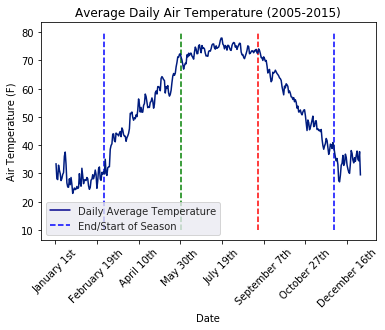

In [14]:
# Group data first by year, then by month
g = df_daily_temp.groupby(['date'])

# For each group, calculate the average of only the MW column
daily_temp_averages = g.aggregate({'DailyAvgAirTemp':np.mean})

# Make the plot
sns.lineplot(data=daily_temp_averages,
                  palette='dark')
plt.vlines(x=season_end,
           ymin=10,
           ymax=80,
           label='End/Start of Season',
           ls='--',colors=colors)
plt.title('Average Daily Air Temperature (2005-2015)')
plt.xticks(rotation=45,
           labels=season_x_labels,
           ticks=season_x_ticks)
plt.xlabel('Date')
plt.ylabel('Air Temperature (F)')
sns.set_style('darkgrid')

import matplotlib.lines as mlines
blue_line = mlines.Line2D([],[],color='darkblue')
dash_line = mlines.Line2D([],[],color='blue',linestyle='--')
plt.legend(handles=[blue_line,dash_line],labels=['Daily Average Temperature',
                   'End/Start of Season'])
plt.show();

# Create a degree days column in daily temp df

In [15]:
# Find somewhere that has both heating and cooling degree days to check later
print(df_daily_temp['DailyCoolingDegreeDays'][500:520])
df_daily_temp['DailyHeatingDegreeDays'][500:520]

2006-05-18     0.0
2006-05-19     0.0
2006-05-20     0.0
2006-05-21     0.0
2006-05-22     0.0
2006-05-23     0.0
2006-05-24     0.0
2006-05-25     8.0
2006-05-26     4.0
2006-05-27     6.0
2006-05-28    10.0
2006-05-29    12.0
2006-05-30    13.0
2006-05-31    12.0
2006-06-01    10.0
2006-06-02     0.0
2006-06-03     0.0
2006-06-04     0.0
2006-06-05     0.0
2006-06-06     4.0
Name: DailyCoolingDegreeDays, dtype: float64


2006-05-18    15.0
2006-05-19     9.0
2006-05-20    11.0
2006-05-21    11.0
2006-05-22    14.0
2006-05-23    10.0
2006-05-24     3.0
2006-05-25     0.0
2006-05-26     0.0
2006-05-27     0.0
2006-05-28     0.0
2006-05-29     0.0
2006-05-30     0.0
2006-05-31     0.0
2006-06-01     0.0
2006-06-02     0.0
2006-06-03     0.0
2006-06-04     2.0
2006-06-05     1.0
2006-06-06     0.0
Name: DailyHeatingDegreeDays, dtype: float64

In [16]:
# Create a [] degree_days to put the values in
degree_days = []
# Loop through each day in df_daily_temp
for day in df_daily_temp.index:
  # Check if CoolingDegreeDays is > 0
  if (df_daily_temp['DailyCoolingDegreeDays'][day] > 0):
    # Append the negative of value to degree_days if it is > 0
    degree_days.append(df_daily_temp['DailyCoolingDegreeDays'][day])
  # Elif check if HeatingDegreeDays is > 0
  elif (df_daily_temp['DailyHeatingDegreeDays'][day] > 0):
    # Appen the value to degree days if it is > 0
    degree_days.append(-df_daily_temp['DailyHeatingDegreeDays'][day])
  # Else append 0
  else:
    degree_days.append(0)

degree_days[:6]

[-17.0, -13.0, -15.0, -25.0, -29.0, -34.0]

In [17]:
degree_days[500:520]

[-15.0,
 -9.0,
 -11.0,
 -11.0,
 -14.0,
 -10.0,
 -3.0,
 8.0,
 4.0,
 6.0,
 10.0,
 12.0,
 13.0,
 12.0,
 10.0,
 0,
 0,
 -2.0,
 -1.0,
 4.0]

In [18]:
# Make new column for DegreeDays set equal to degree_days
df_daily_temp['DegreeDays'] = degree_days
df_daily_temp['DegreeDays'].head()

2005-01-01   -17.0
2005-01-02   -13.0
2005-01-03   -15.0
2005-01-04   -25.0
2005-01-05   -29.0
Name: DegreeDays, dtype: float64

# Check out the relationship between cooling/heating degree days and MW consumed

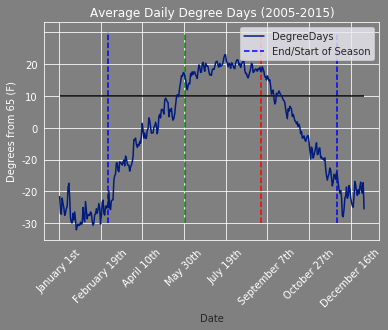

In [19]:
# Group data first by year, then by month
g = df_daily_temp.groupby(['date'])

# For each group, calculate the average of only the degree days column
daily_dd_averages = g.aggregate({'DegreeDays':np.mean})

# Make the plot
fig, ax = plt.subplots()
ax = sns.lineplot(data=daily_dd_averages,
                  palette='dark')
ax.vlines(x=season_end,
           ymin=-40,
           ymax=20,
           label='End/Start of Season',
           ls='--',colors=colors)
ax.hlines(y=0,
           xmin=min(daily_dd_averages.index),
           xmax=max(daily_dd_averages.index))
ax.set_title('Average Daily Degree Days (2005-2015)',
             color='white')
ax.set_xticklabels(rotation=45,
           labels=season_x_labels,
           color='white')
ax.set_yticklabels(labels=[-40,-30,-20,-20,0,10,20],
                   color='white')
ax.set_xticks(ticks=season_x_ticks)
ax.set_xlabel('Date')
ax.set_ylabel('Degrees from 65 (F)',
              color='white')
# Color of facecolor and grid
ax.set_facecolor('gray')
fig.set_facecolor('gray')
ax.legend();

In [0]:
# plt.stackplot()

In [21]:
print(len(daily_dd_averages))
print(len(daily_energy_averages))
print(len(daily_temp_averages))

366
366
366


In [22]:
daily_averages = daily_energy_averages.merge(daily_dd_averages,
                                             left_index=True,
                                             right_index=True)
daily_averages.head()

,MW,DegreeDays
date,,
1,1834.988636,-31.636364
2,2076.503788,-36.909091
3,2214.693182,-37.181818
4,2178.443182,-32.090909
5,2203.897727,-33.818182


In [23]:
daily_averages.corr()

,MW,DegreeDays
MW,1.000000,-0.010044
DegreeDays,-0.010044,1.000000


In [0]:
# Group data first by year, then by month
g = df_daily_temp.groupby(['date'])

# For each group, calculate the average of only the degree days column
daily_cooling_averages = g.aggregate({'DailyCoolingDegreeDays':np.mean})
daily_heating_averages = g.aggregate({'DailyHeatingDegreeDays':np.mean})

In [25]:
daily_averages = daily_energy_averages.merge(daily_cooling_averages,
                                             left_index=True,
                                             right_index=True)
daily_averages = daily_averages.merge(daily_heating_averages,
                                             left_index=True,
                                             right_index=True)
daily_averages = daily_averages.merge(daily_temp_averages,
                                             left_index=True,
                                             right_index=True)
daily_averages.head()

,MW,DailyCoolingDegreeDays,DailyHeatingDegreeDays,DailyAvgAirTemp
date,,,,
1,1834.988636,0.0,31.636364,33.363636
2,2076.503788,0.0,36.909091,28.090909
3,2214.693182,0.0,37.181818,27.818182
4,2178.443182,0.0,32.090909,32.909091
5,2203.897727,0.0,33.818182,31.181818


In [26]:
daily_averages.corr()

,MW,DailyCoolingDegreeDays,DailyHeatingDegreeDays,DailyAvgAirTemp
MW,1.000000,0.504602,0.150140,-0.010044
DailyCoolingDegreeDays,0.504602,1.000000,-0.742434,0.834790
DailyHeatingDegreeDays,0.150140,-0.742434,1.000000,-0.988613
DailyAvgAirTemp,-0.010044,0.834790,-0.988613,1.000000


# Make a plot(s) that explains degree days

In [27]:
# Correlation table that shows that degree cooling/heating is more directly
# correlated with MW than just the temperature
corr_mw_dd = daily_averages.corr()
corr_mw_dd = pd.DataFrame(corr_mw_dd['MW'])
corr_mw_dd.style.background_gradient(cmap='coolwarm')

,MW
MW,1
DailyCoolingDegreeDays,0.504602
DailyHeatingDegreeDays,0.15014
DailyAvgAirTemp,-0.0100443


In [28]:
corr_mw_dd.shape

(4, 1)

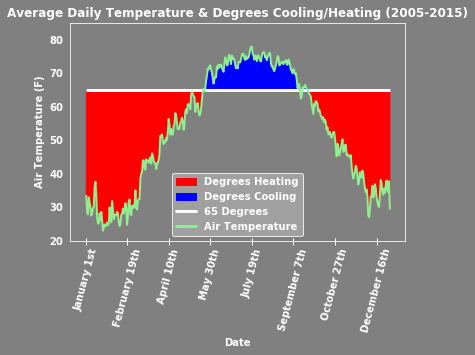

In [140]:
# Plot average daily temp to show degrees cooling
fig, ax = plt.subplots()

# Plot the average daily temp
ax.set_xlabel(xlabel='Date',
              color='white',
              weight='bold')
ax.set_ylabel('Air Temperature (F)',
              color='white',
              weight='bold')
ax.plot(daily_temp_averages.index,
        daily_temp_averages['DailyAvgAirTemp'],
        color='lightgreen',
        linewidth=2)
ax.tick_params(axis='y',
               labelcolor='white')
ax.tick_params(axis='x',
               labelcolor='white')
ax.set_ylim(ymin=20,ymax=85)
ax.hlines(y=65,xmin=0,xmax=366,linewidth=3,color='white')
plt.xticks(rotation=75,
           labels=season_x_labels,
           ticks=season_x_ticks,
           weight='bold')
plt.yticks(weight='bold')
plt.tick_params(axis='x', colors='white', direction='inout', length=7, width=1)
plt.tick_params(bottom='on')

# Fill between temps and 65 degrees
ax.fill_between(x=daily_temp_averages.index,
                y1=65,
                y2=daily_temp_averages['DailyAvgAirTemp'],
                where=daily_temp_averages['DailyAvgAirTemp']<65,
                interpolate=True,
                color='red')
ax.fill_between(x=daily_temp_averages.index,
                y1=daily_temp_averages['DailyAvgAirTemp'],
                y2=65,
                where=daily_temp_averages['DailyAvgAirTemp']>65,
                interpolate=True,
                color='blue')
plt.title('Average Daily Temperature & Degrees Cooling/Heating (2005-2015)',
          color='white',
          weight='bold')


# Color of facecolor and grid
ax.set_facecolor('gray')
fig.set_facecolor('gray')
ax.grid(False)

# Create the legend lines and patches
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red')
blue_patch = mpatches.Patch(color='blue')
white_line = mlines.Line2D([],[],color='white',
                           linewidth=3)
yellow_line = mlines.Line2D([],[],color='lightgreen',
                            linewidth=3)

# Create the legend
l = ax.legend(handles=[red_patch,
                   blue_patch,
                   white_line,
                   yellow_line],
          labels=['Degrees Heating',
                  'Degrees Cooling',
                  '65 Degrees',
                  'Air Temperature'],
          facecolor='darkgray',
          edgecolor='white')

# Change legend font color
for text in l.get_texts():
    text.set_color("white")
    text.set_weight('bold')

plt.show()

In [30]:
daily_dd_averages.head()

,DegreeDays
date,
1,-31.636364
2,-36.909091
3,-37.181818
4,-32.090909
5,-33.818182
